# Cargar Libreriias 

In [2]:
import sys # Para movernos dentro de las carpetas
import os # Para movernos dentro de las carpetas
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Preprocesar las imagenes que van a estrar al algoritmo 
from tensorflow.keras import optimizers # Para optimizar el algoritmo 
from tensorflow.keras.models import Sequential # Para hacer una red neuronal secuencial 
from tensorflow.keras.layers import Dropout, Flatten, Dense, Activation, Conv2D # Manipular los datos de entrada 
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, BatchNormalization # Capasa para hacer convoluciones y pooling
from tensorflow.keras import backend as k # serrar sesiones anteriores
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras import Model
import tensorflow as tf
import os
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import cv2
import pathlib

In [3]:
k.clear_session()

### Dirección de los datos 

In [5]:
data_entrenamiento = './data/entrenamiento'
data_validacion = './data/validacion'

# Parametros 

In [7]:
epocas = 20 # Numero de iteraciones del set de datos en el entrenamiento 
altura = 100 # Tamaño de imagenes para ingresar a la red
longitud = 100 # Tamaño de imagenes para ingresar a la red 
batch_size = 32 # Número de imagenes que se procesaran en cada pado
pasos = 100 # Número de pasos en cada epoca 
pasos_validacion = 100 # datos de validación 
filtrosConv1 = 32 # Número de filtros para la convolución
filtrosConv2 = 64 # Número de filtros para la convolución
tamano_filtro1 = (3,3) # Kernel
tamano_filtro2 = (2,2) # Kernel
tamano_pool = (2,2) # Tamaño del filtro del macpooling
clases = 5 # 5 categorias
lr = 0.0005 # learning rate, tamaño de ajustes de la red para acercarse a una solucion optima 

## Entubamiento de los datos
* Preprocesamiento de imagenes
* Generar las imagenes para entrenar

### Imágenes entrenamiento

In [8]:
entrenamiento_datagen = ImageDataGenerator(
    rescale=1./255, # Reescalar las imagenes
    shear_range=0.3, # Inclinar las imagenes 
    zoom_range=0.3, # Amplia las imagenes
    horizontal_flip=True, #Invierte las imagenes
    rotation_range=40 # Rotar las imagenes
)

In [9]:
imagen_entrenamiento = entrenamiento_datagen.flow_from_directory(
    data_entrenamiento, target_size=(altura,longitud),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 19975 images belonging to 5 classes.


### Imágenes validación

In [13]:
validacion_datagen = ImageDataGenerator(
        rescale=1./255)

In [26]:
imagen_validacion = validacion_datagen.flow_from_directory(
    data_validacion, target_size=(altura,longitud),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 5000 images belonging to 5 classes.


## Visualizar las imagenes

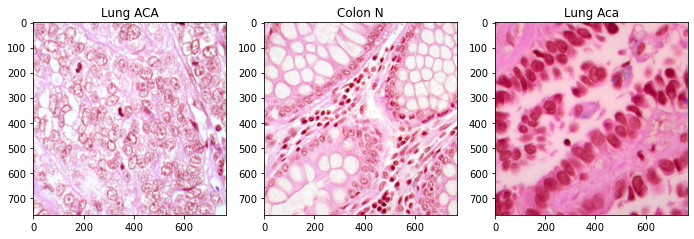

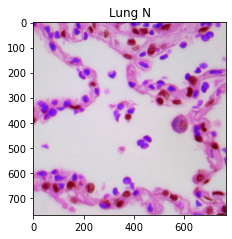

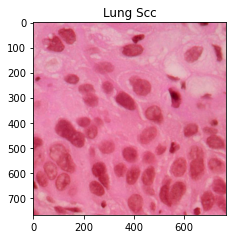

In [24]:
lung_aca = './data/entrenamiento/colon_aca/'
plt.figure(figsize = (20, 20))
plt.subplot(151)
img = cv2.imread(lung_aca + os.listdir(lung_aca)[0])
plt.title('Lung ACA')
plt.imshow(img)

colon_n = './data/entrenamiento/colon_n/'
plt.subplot(152)
img = cv2.imread(colon_n + os.listdir(colon_n)[0])
plt.title('Colon N')
plt.imshow(img)

plt.subplot(153)
lung_aca = './data/entrenamiento/lung_aca/'
img = cv2.imread(lung_aca + os.listdir(lung_aca)[0])
plt.title('Lung Aca')
plt.imshow(img)
plt.show()

plt.figure(figsize = (20,20))
plt.subplot(154)
lung_n = './data/entrenamiento/lung_n/'
img = cv2.imread(lung_n + os.listdir(lung_n)[0])
plt.title('Lung N')
plt.imshow(img)
plt.show()

plt.figure(figsize = (20,20))
plt.subplot(155)
lung_scc = './data/entrenamiento/lung_scc/'
img = cv2.imread(lung_scc + os.listdir(lung_scc)[0])
plt.title('Lung Scc')
plt.imshow(img)
plt.show()